In [14]:
import pandas as pd
df = pd.read_csv("66193047-2784-4138-a64e-1c5565dcc494.csv", delimiter=";")
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,4,0,STARFRUIT,4906,2,4905.0,20.0,NaN,NaN,4912,22,NaN,NaN,NaN,NaN,4909.0,0.000000
1,4,0,STRAWBERRIES,3957,199,NaN,NaN,NaN,NaN,3959,199,NaN,NaN,NaN,NaN,3958.0,0.000000
2,4,0,COCONUT,9883,133,9882.0,47.0,NaN,NaN,9884,133,9885.0,47.0,NaN,NaN,9883.5,0.000000
3,4,0,COCONUT_COUPON,574,45,NaN,NaN,NaN,NaN,575,45,NaN,NaN,NaN,NaN,574.5,0.000000
4,4,0,ROSES,13712,63,NaN,NaN,NaN,NaN,13714,63,NaN,NaN,NaN,NaN,13713.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,4,99900,ROSES,13677,74,NaN,NaN,NaN,NaN,13678,28,13679.0,46.0,NaN,NaN,13677.5,0.000000
8996,4,99900,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,1574.000000
8997,4,99900,STARFRUIT,4898,4,4897.0,31.0,NaN,NaN,4903,2,4904.0,29.0,NaN,NaN,4900.5,1163.279785
8998,4,99900,CHOCOLATE,7828,125,NaN,NaN,NaN,NaN,7829,58,7830.0,67.0,NaN,NaN,7828.5,9853.125000


In [15]:
columns_to_keep = [col for col in df.columns if col not in ['product', 'timestamp']]

# Pivot the DataFrame
df_pivoted = df.pivot_table(index='timestamp', columns='product', values=columns_to_keep, aggfunc='mean')

# Combine the level names with the product names
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]

# Reset the index if you want 'timestamp' back as a column
df_pivoted.reset_index(inplace=True)

# Display the head of the pivoted DataFrame
df_pivoted

,timestamp,ask_price_1_AMETHYSTS,ask_price_1_CHOCOLATE,ask_price_1_COCONUT,ask_price_1_COCONUT_COUPON,ask_price_1_GIFT_BASKET,ask_price_1_ORCHIDS,ask_price_1_ROSES,ask_price_1_STARFRUIT,ask_price_1_STRAWBERRIES,...,mid_price_STRAWBERRIES,profit_and_loss_AMETHYSTS,profit_and_loss_CHOCOLATE,profit_and_loss_COCONUT,profit_and_loss_COCONUT_COUPON,profit_and_loss_GIFT_BASKET,profit_and_loss_ORCHIDS,profit_and_loss_ROSES,profit_and_loss_STARFRUIT,profit_and_loss_STRAWBERRIES
0,0,10004.0,7833.0,9884.0,575.0,69152.0,1107.0,13714.0,4912.0,3959.0,...,3958.0,0.0,0.000,0.00,0.00000,0.000,0.0,0.0,0.000000,0.000
1,100,10000.0,7832.0,9886.0,576.0,69136.0,1107.0,13713.0,4908.0,3959.0,...,3958.0,0.0,0.000,0.00,0.00000,0.000,0.0,0.0,0.000000,0.000
2,200,10004.0,7835.0,9886.0,576.0,69158.0,1107.0,13714.0,4912.0,3959.0,...,3958.0,0.0,0.000,0.00,0.00000,0.000,0.0,0.0,0.000000,0.000
3,300,10004.0,7835.0,9887.0,578.0,69144.0,1106.0,13712.0,4912.0,3958.0,...,3957.5,6.0,0.000,0.00,0.00000,0.000,0.0,0.0,0.000000,0.000
4,400,10005.0,7835.0,9886.0,577.0,69143.0,1106.0,13708.0,4913.0,3959.0,...,3958.0,6.0,0.000,0.00,0.00000,0.000,0.0,0.0,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,10004.0,7832.0,9877.0,590.0,69170.0,1121.0,13681.0,4902.0,3981.0,...,3980.5,1567.0,9177.000,4879.75,31878.06250,22611.500,0.0,0.0,1161.492188,4330.000
996,99600,10004.0,7831.0,9878.0,591.0,69175.0,1121.0,13680.0,4902.0,3981.0,...,3980.5,1567.0,9329.125,4702.25,31206.81250,22487.500,0.0,0.0,1161.886230,4410.750
997,99700,10002.0,7831.0,9876.0,590.0,69169.0,1120.0,13681.0,4902.0,3981.0,...,3980.5,1567.0,9437.250,5166.50,31958.56250,22636.375,0.0,0.0,1162.018555,4368.125
998,99800,10005.0,7830.0,9876.0,590.0,69160.0,1120.0,13677.0,4903.0,3981.0,...,3980.5,1568.0,9619.625,5142.50,32272.21875,22888.375,0.0,0.0,1162.993164,4471.000


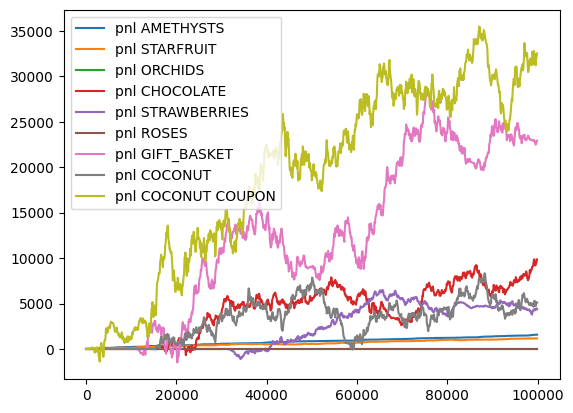

In [16]:
import matplotlib.pyplot as plt
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_AMETHYSTS'], label='pnl AMETHYSTS')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_STARFRUIT'], label='pnl STARFRUIT')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_ORCHIDS'], label='pnl ORCHIDS')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_CHOCOLATE'], label='pnl CHOCOLATE')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_STRAWBERRIES'], label='pnl STRAWBERRIES')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_ROSES'], label='pnl ROSES')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_GIFT_BASKET'], label='pnl GIFT_BASKET')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_COCONUT'], label='pnl COCONUT')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_COCONUT_COUPON'], label='pnl COCONUT COUPON')
plt.legend()

In [17]:
pnl_amethysts = df_pivoted["profit_and_loss_AMETHYSTS"].sum()
pnl_starfruit = df_pivoted["profit_and_loss_STARFRUIT"].sum()
pnl_orchids = df_pivoted["profit_and_loss_ORCHIDS"].sum()
pnl_chocolate = df_pivoted["profit_and_loss_CHOCOLATE"].sum()
pnl_strawberries = df_pivoted["profit_and_loss_STRAWBERRIES"].sum()
pnl_roses = df_pivoted["profit_and_loss_ROSES"].sum()
pnl_gift_basket = df_pivoted["profit_and_loss_GIFT_BASKET"].sum()
pnl_coconut = df_pivoted["profit_and_loss_COCONUT"].sum()
pnl_coconut_coupon = df_pivoted["profit_and_loss_COCONUT_COUPON"].sum()
print(f"amethysts profit: {pnl_amethysts}")
print(f"starfruit profit: {pnl_starfruit}")
print(f"orchids profit: {pnl_orchids}")
print(f"chocolate profit: {pnl_chocolate}")
print(f"strawberries profit: {pnl_strawberries}")
print(f"roses profit: {pnl_roses}")
print(f"gift basket profit: {pnl_gift_basket}")
print(f"coconut profit: {pnl_coconut}")
print(f"coconut coupon profit: {pnl_coconut_coupon}")

amethysts profit: 817481.0
starfruit profit: 622931.30859375
orchids profit: 0.0
chocolate profit: 4310457.470703125
strawberries profit: 2329176.115234375
roses profit: 0.0
gift basket profit: 12660708.4921875
coconut profit: 3256174.46875
coconut coupon profit: 19226539.100585938


In [14]:
df_pivoted["profit_and_loss_ORCHIDS"].min()

-545.51416015625

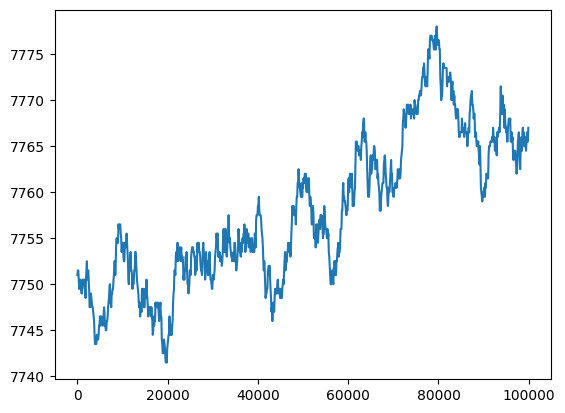

In [5]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_CHOCOLATE'], label='CHOCOLATE')

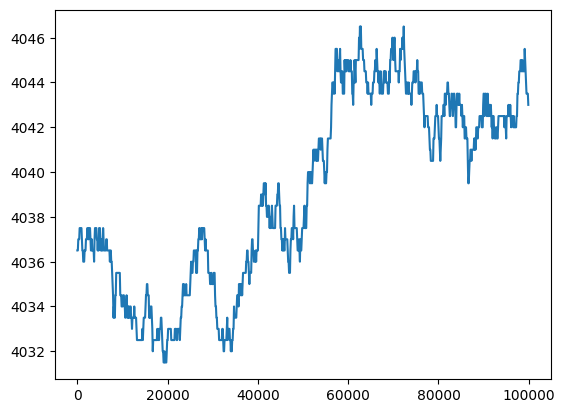

In [25]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_STRAWBERRIES'], label='STRAWBERRIES')

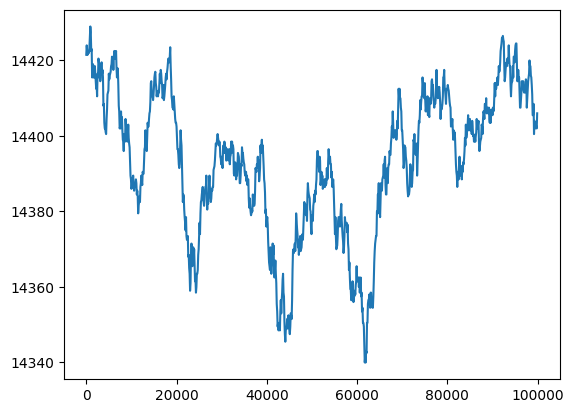

In [26]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_ROSES'], label='ROSES')

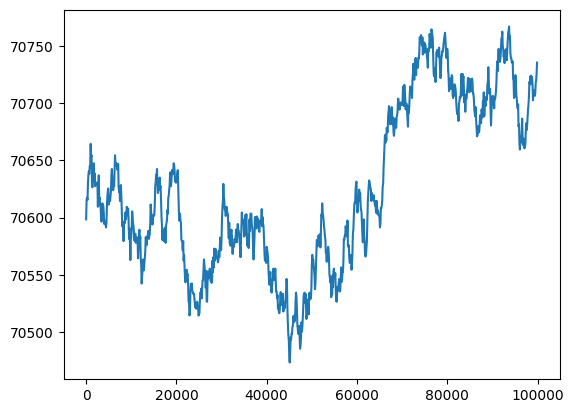

In [27]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_GIFT_BASKET'], label='GIFT BASKET')

In [28]:
corr_cols = ["mid_price_CHOCOLATE", "mid_price_STRAWBERRIES", "mid_price_ROSES", "mid_price_GIFT_BASKET"]
corr_matrix = df_pivoted[corr_cols].corr()
corr_matrix

,mid_price_CHOCOLATE,mid_price_STRAWBERRIES,mid_price_ROSES,mid_price_GIFT_BASKET
mid_price_CHOCOLATE,1.000000,0.630684,0.307079,0.789373
mid_price_STRAWBERRIES,0.630684,1.000000,-0.023705,0.576325
mid_price_ROSES,0.307079,-0.023705,1.000000,0.657614
mid_price_GIFT_BASKET,0.789373,0.576325,0.657614,1.000000


411.9 33.389996883675984


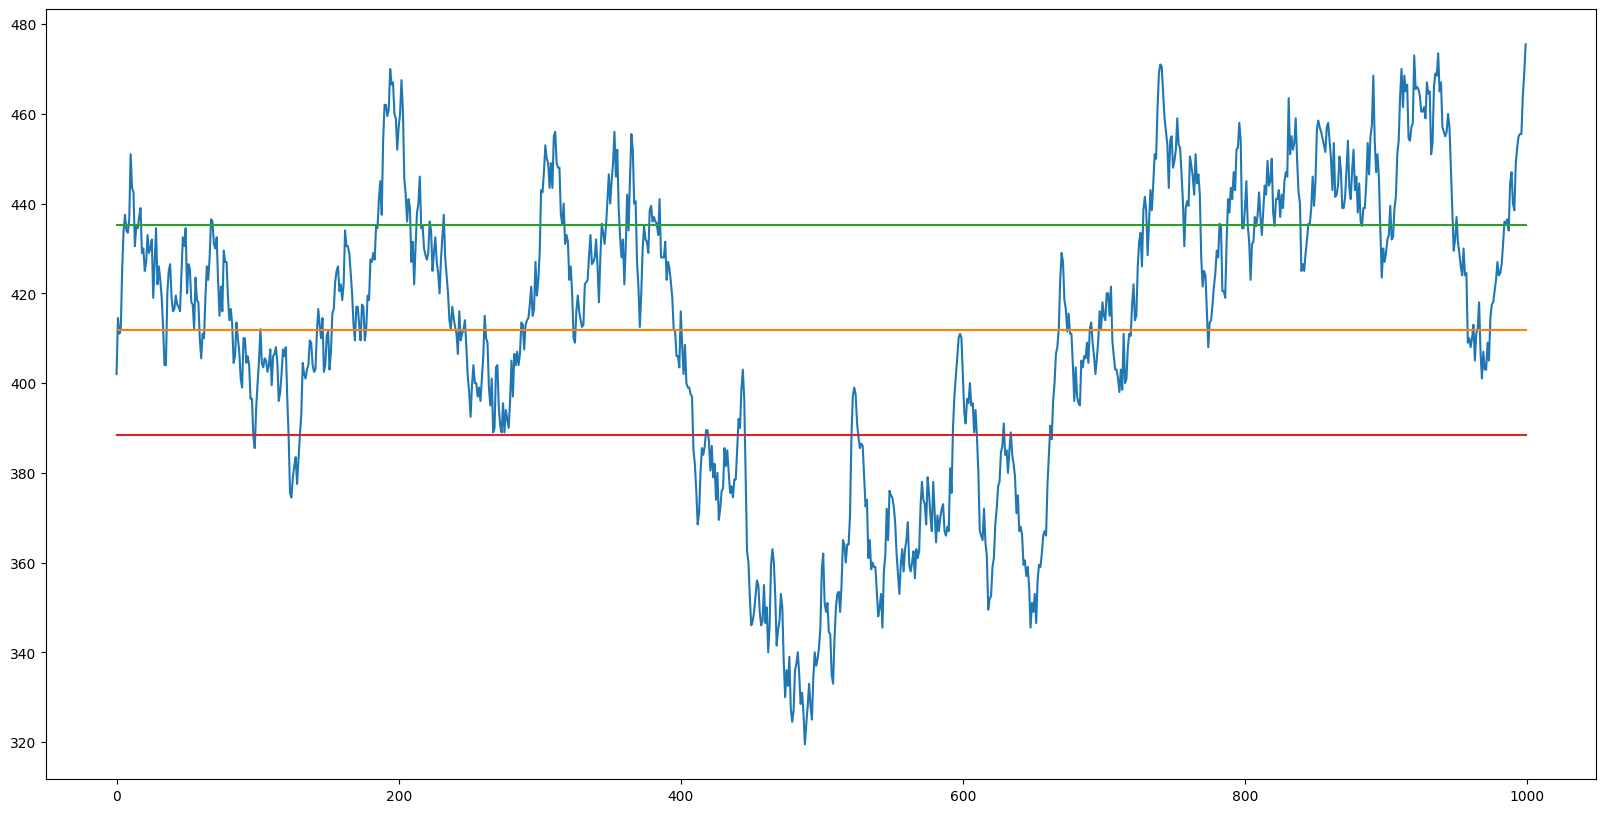

In [29]:
import statistics
size = 1000

basket_midprices = df_pivoted['mid_price_GIFT_BASKET'].to_list()[0:size]
straw_midprices = df_pivoted['mid_price_STRAWBERRIES'].to_list()[0:size]
choco_midprices = df_pivoted['mid_price_CHOCOLATE'].to_list()[0:size]
roses_midprices = df_pivoted['mid_price_ROSES'].to_list()[0:size]

difference = []

times = [i for i in range(size)]

for i in range(len(basket_midprices)):
    diff = basket_midprices[i] - 6*straw_midprices[i] - 4*choco_midprices[i] - roses_midprices[i]
    difference.append(diff)

mean, std = statistics.mean(difference), statistics.stdev(difference)
print(mean, std)